# Teoría cuántica básica, Observables y Medidas

## Simule el primer sistema cuántico descrito en la sección 4.1.
El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.


In [6]:
import numpy as np

#Calculamos la norma del vector
def norm(ket): 
    return np.linalg.norm(ket)

#Calculamos la probabilidad de encontrar la partícula en todas las posiciones
def probabilidad(n,ket):
    for i in range(n):
        print(f"Probabilidad de encontrar la partícula en x{i}: {abs(ket[i])**2/norm(ket)**2}")

#Calculamos la probabilidad de encontrar la partícula en cualquier posición
def probabilidadEs(ket,i):
    print(f"Probabilidad de encontrar la partícula en x{i}: {abs(ket[i])**2/norm(ket)**2}")

def main():
    #Asumimos que la particula puede estar en cuatro posiciones 
    n = 4
    ket = np.array([-3 - 1j, -2j, 1j, 2])
    probabilidad(n,ket)
    #Probabilidad para la posicion 3
    i = 3
    print(f"Si deseamos calculal la probabilidad específica en un punto: x_{i}")
    probabilidadEs(ket,i)
main()

Probabilidad de encontrar la partícula en x0: 0.5263157894736842
Probabilidad de encontrar la partícula en x1: 0.21052631578947364
Probabilidad de encontrar la partícula en x2: 0.05263157894736841
Probabilidad de encontrar la partícula en x3: 0.21052631578947364
Si deseamos calculal la probabilidad específica en un punto: x_3
Probabilidad de encontrar la partícula en x3: 0.21052631578947364



2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [13]:
import numpy as np

#Calculamos la norma del vector
def norm(ket): 
    return np.linalg.norm(ket)

#Normalizamos el vector 
def normaliza(ket):
    return ket/norm(ket)

#Probabilidad de transicion
def probabilidadT(ket,ket2):
    bra = np.vdot(normaliza(ket),normaliza(ket2))
    print(np.abs(bra)**2)

def main():
    #Asumimo el primr ket
    ket = np.array([-3 - 1j, -2j, 1j, 2])
    #Asumimos el segundo ket
    ket2 = np.array([-3 , -2j, 0, 2j+1])

    #Calculamos la probabilidad 
    probabilidadT(ket,ket2)
main()

0.6608187134502924


## Complete los retos de programación del capítulo 4.

1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación



In [8]:
#Suponemos dos vectores 
ket = np.array([-3 - 1j, -2j, 1j, 2])
ketpri = np.array([-3 - 2j, -2, 1j, 2])

def norm(ket): 
    return np.linalg.norm(ket)

#Teniendo en cuenta la definición de producto interno, calculamos la amplitud de transicion
producto_interno = np.vdot(ket/norm(ket), ketpri/norm(ketpri))  
producto_interno


np.complex128(0.7825855808712293-0.04891159880445184j)

2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [8]:
#Definimos un estado
ket = np.array([-3 - 1j, -2j, 1j, 2])
#Definimos la matriz que describe el observable
matriz = np.array([[1, 2 - 1j, 0, 0],
                   [2 + 1j, 3, 4, 0],
                   [0, 4, 5, -1],
                   [0, 0, -1, 2]])

#Comprobamos que la matriz es hermitiana
if np.array_equal(matriz, matriz.conj().T):
    print("La matriz es hermitiana")
    #Calculamos la media
    media = np.real(np.vdot(ket, np.dot(matriz, ket)))
    print(f"La media es: {media}")
    #Calculamos la varainza
    varianza = np.real(np.vdot(ket, np.dot(np.dot(matriz, matriz) , ket))) - media**2
    print(f"La varainza es: {varianza}")

else:
    print("La matriz no es hermitiana")




La matriz es hermitiana
La media es: 39.0
La varainza es: -1367.0


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.



In [17]:
#Definimos la matriz que describe el observable
matriz = np.array([[1, 2 - 1j, 0, 0],
                   [2 + 1j, 3, 4, 0],
                   [0, 4, 5, -1],
                   [0, 0, -1, 2]])

ket = np.array([-3 - 1j, -2j, 1j, 2])
#Calculamos los vectores y valores propios de la matriz
valores, vectores = np.linalg.eig(matriz)

m = 0
for i in valores:
    print(f"Valor propio {m+1} : {i}")
    m = m + 1

#Ahora calculamos la probabilidad de que el sistema transite a alguno de los vectores propios
n = 0
for i in vectores:
    print(f"Probabilidad para el vector del valor propio {n + 1}: {np.real(np.vdot(ket,i))**2}")
    n = n + 1



Valor propio 1 : (8.479804239443677-3.6178305313558496e-16j)
Valor propio 2 : (-1.5334333052227214+1.0644464174638207e-16j)
Valor propio 3 : (2.5394294261975916+9.429068764566432e-17j)
Valor propio 4 : (1.5141996395814594+5.0025421281022696e-17j)
Probabilidad para el vector del valor propio 1: 4.7923715390672825
Probabilidad para el vector del valor propio 2: 4.524567507171867
Probabilidad para el vector del valor propio 3: 2.35089470319071
Probabilidad para el vector del valor propio 4: 3.327084765859387


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial

In [29]:
import numpy as np

#Definimos el estado inicial
estado0 = np.array([-3 - 1j, -2j, 2])
 

#Definimos la serie de matrices
m1 = np.array([[np.sqrt(2)/2, -np.sqrt(2)/2, 0],
              [np.sqrt(2)/2, np.sqrt(2)/2, 0],
              [0, 0, 1]])

m2 = np.array([[np.cos(np.pi / 4), 0, np.sin(np.pi / 4)],
              [0, 1, 0],
              [-np.sin(np.pi / 4), 0, np.cos(np.pi / 4)]])

m3 = np.array([[0, 1, 0],
              [1, 0, 0],
              [0, 0, 1]])


estado1 = np.dot(m1, estado0)  
estado2 = np.dot(m2, estado1)  
estado3 = np.dot(m3, estado2) 
estadof = np.dot(m1, estado3) 

print("Estado resultante:")
print(estadof)


Estado resultante:
[-1.43933983-1.85355339j -1.56066017-1.14644661j  2.91421356-0.5j       ]


## Problemas propuestos 

Modele en su librería los problemas

4.3.1

4.3.2

4.4.1

4.4.2

Desarrolle e incluya en el Github una discusión de los ejercicios 4.5.2 y 4.5.3

### Solución 4.3.1

Find all the possible states the system described in Exercise 4.2.2
can transition into after a measurement has been carried out.



In [34]:
import numpy as np
#Definimos el estado de spin hacia arriba

estado0 = np.array([[1],[0]])

#Definimos la matrix Sx
h = 1
S = h/2*np.array([[0,1],
              [1,0]])

#Aplicando Sx al estado incial
estado1 = np.dot(S,estado0)

print(f"El estado resultante despues que Sx actua sobre el estado inicial es:")
print(estado1)
#Normalizamos el estado resultante ->>> estado1
estado_resultante = estado1 / np.linalg.norm(estado1)

#Tenemos en cuenta que el spin puede estas en un estado hacia arriba o en un estado hacia abajo
#Definimos los dos estados probables
up = np.array([[1],[0]])
down = np.array([[0],[1]])


#Calculamos la probabilidad de transicion para cada caso
pr_up = np.vdot(estado_resultante,up)**2
pr_down = np.vdot(estado_resultante,down)**2

print(f"Probabilidad de transitar al estado up: {pr_up} ")
print(f"Probabilidad de transitar al estado down: {pr_down}")


El estado resultante despues que Sx actua sobre el estado inicial es:
[[0. ]
 [0.5]]
Probabilidad de transitar al estado up: 0.0 
Probabilidad de transitar al estado down: 1.0


### Solución 4.3.2

Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example

Probabilidad para el vector del valor propio 1: 0.5000000000000001
Probabilidad para el vector del valor propio 2: 0.4999999999999998


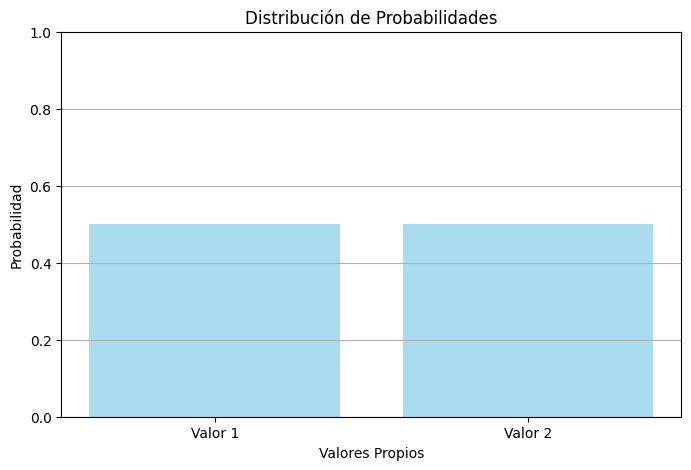

In [6]:
import numpy as np
import matplotlib.pyplot as plt
estado0 = np.array([[1],[0]])

#Definimos la matrix Sx
h = 1
S = h/2*np.array([[0,1],
              [1,0]])
#Calculamos los valores y vectores propios
valores, vectores = np.linalg.eig(S)

#Ahora calculamos la probabilidad de que el sistema transite a alguno de los vectores propios
n= 0
probabilidades = []
for i in vectores:
    probabilidad = np.real(np.vdot(estado0, i))**2
    probabilidades.append(probabilidad)
    print(f"Probabilidad para el vector del valor propio {n + 1}: {probabilidad}")
    n = n + 1

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(valores) + 1), probabilidades, tick_label=[f"Valor {i+1}" for i in range(len(valores))], color='skyblue', alpha=0.7)
plt.xlabel('Valores Propios')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidades')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

### Solución 4.4.1

Verify that


$$ U = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $$   
$$ W = \begin{bmatrix} \sqrt{2}/2 & \sqrt{2}/2 \\ \sqrt{2}/2 & -\sqrt{2}/2 \end{bmatrix} $$ 

are unitary matrices. Multiply them and verify that their product is also unitary.



In [20]:
u = np.array([[0,1],[1,0]])
w = np.array([[np.sqrt(2)/2,np.sqrt(2)/2],[np.sqrt(2)/2,-np.sqrt(2)/2]])
 
identidad = np.eye(u.shape[0])

#Verificamos que U es unitaria
if np.allclose(np.dot(u,u.conj().T),identidad):
    print("U es unitaria")
else:
    print("U no es unitaria")

#Verificamos que W es unitaria
if np.allclose(np.dot(w,w.conj().T),identidad):
    print("W es unitaria")
else:
    print("W no es unitaria")

#Verificamos que su productor tambien es unitario
uw = np.dot(u,w)
if np.allclose(np.dot(uw,uw.conj().T),identidad):
    print("U X W es unitario")
else:
    print("U X W no es unitario")


U es unitaria
W es unitaria
U X W es unitario


### Solución 4.4.2

Go back to Example 3.3.2 (quantum billiard ball), keep the same initial state vector [1, 0, 0, 0]T, but change the unitary map to

\begin{bmatrix} 
0 & 1/\sqrt{2} & 1/\sqrt{2} & 0 \\ 
i/\sqrt{2} & 0 & 0 & 1/\sqrt{2} \\ 
1/\sqrt{2} & 0 & 0 & i/\sqrt{2} \\ 
0 & 1/\sqrt{2} & -1/\sqrt{2} & 0 \end{bmatrix}

Determine the state of the system after three time steps. What is the chance of the quantum ball to be found at point 3?

In [39]:
import numpy as np
estado0 = np.array([[1],[0],[0],[0]])

matriz = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])

#Caculamos los estados con tres clics
print("Clic 1: ")
estado1 = np.dot(matriz,estado0)
print(estado1)
print("Clic 2: ")
estado2 = np.dot(matriz,estado1)
print(estado2)
print("Clic 3: ")
estado3 = np.dot(matriz,estado2)
print(estado3)

#calculamos la probabilidad para la posicion 3
norma = np.linalg.norm(estado3)


#Calculamos la probabilidad de encontrar la partícula en cualquier posición
print(f"La probabilidad de que la bola se encuentre en el punto 3 es: {(estado3[3][0])**2/norma**2}")




Clic 1: 
[[0.        +0.j        ]
 [0.        +0.70710678j]
 [0.70710678+0.j        ]
 [0.        +0.j        ]]
Clic 2: 
[[ 0.5+0.5j]
 [ 0. +0.j ]
 [ 0. +0.j ]
 [-0.5+0.5j]]
Clic 3: 
[[ 0.        +0.j        ]
 [-0.70710678+0.70710678j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
La probabilidad de que la bola se encuentre en el punto 3 es: 0j


### Solución 4.5.2

Write down the generic state vector for the system of two particles
with spin. Generalize it to a system with n particles (this is important: it will be the physical realization for quantum registers!).

El producto tensorial entre dos estados $|U_{1}\rangle$  y  $|U_{2}\rangle$ que definen el estado e cada partícula nos permiten definir el vector de estado, pues si tenemos en cuenta que, existen el sistema los estados $|U_{1}\rangle$  y  $|U_{2}\rangle$, el vector que define el estado del sistema es: 

\begin{equation}
|X\rangle = |U_{1}\rangle \otimes |U_{2}\rangle
\end{equation}

Ahora, teniendo en cuenta la ecuación (1), si suponemos un sistema de más partículas, un sistema de n particulas, podemos usar esta ecuación para crear un vector que describa el estao general para el sistema de la siguiente forma:

Dado un sistema de n partículas, sean $ U_{0},U_{1},U_{i-1}...U_{i}$ partículas del sistema, y sea $|X\rangle$ la ecuación que describe el estado gerar del sistema entonces $|X\rangle$ se define como:

\begin{equation}
|X\rangle = |U_{0}\rangle \otimes |U_{1}\rangle \otimes |U_{2}\rangle \otimes \dots \otimes |U_{n}\rangle
\tag{2}
\end{equation}




### Solución 4.5.3

Assume the same scenario as in Example 4.5.2 and let

$|\phi\rangle = |x_{0}\rangle \otimes |y_{1}\rangle + |x_{1}\rangle \otimes |y_{1}\rangle $

Is this state separable?


Teniendo en cuenta la definicion del producto tensorial y sabiendo que se comporta de forma similar a la multiplicación distributiva en álgebra, entonces la expresion

$|\phi\rangle = |x_{0}\rangle \otimes |y_{1}\rangle + |x_{1}\rangle \otimes |y_{1}\rangle$  

se puede expresar como:

$|\phi\rangle = (|x_{0}\rangle + |x_{1}\rangle) \otimes |y_{1}\rangle$ 

De esta forma pordemos decir que el producto tensorial satisface que:
 
$(|x_{0}\rangle + |x_{1}\rangle) \otimes |y_{1}\rangle = |x_{0}\rangle \otimes |y_{1}\rangle + |x_{1}\rangle \otimes |y_{1}\rangle$ 

Ahora bien, podemos observar que el factor $(|x_{0}\rangle + |x_{1}\rangle)$ se convierte en otro vector, de esta forma podemos decir que se genera en el sistema un estado $|X\rangle$ que pueda definir el estado $(|x_{0}\rangle + |x_{1}\rangle)$ y de esta forma podemos definir el estado incial $|\phi\rangle$ como:

$|\phi\rangle = |X\rangle \otimes |y_{1}\rangle$ 

De esta forma podemos decir que el estado $|\phi\rangle$ es separable.

